<a href="https://colab.research.google.com/github/Himaaa3/kpi/blob/main/KPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data loading

### Subtask:
Load the student grading dataset.


**Reasoning**:
Load the dataset and display its first few rows and shape to verify the data is loaded correctly.



In [6]:
import pandas as pd

try:
    df = pd.read_csv('Students_Grading_Dataset.csv')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'Students_Grading_Dataset.csv' not found.")
except pd.errors.ParserError:
    print("Error: Unable to parse the CSV file.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,S1000,Omar,Williams,student0@university.com,Female,22,Mathematics,97.36,40.61,59.61,...,62.84,83.49,C,10.3,Yes,No,Master's,Medium,1,5.9
1,S1001,Maria,Brown,student1@university.com,Male,18,Business,97.71,57.27,74.00,...,98.23,92.29,F,27.1,No,No,High School,Low,4,4.3
2,S1002,Ahmed,Jones,student2@university.com,Male,24,Engineering,99.52,41.84,63.85,...,91.22,93.55,F,12.4,Yes,No,High School,Low,9,6.1
3,S1003,Omar,Williams,student3@university.com,Female,24,Engineering,90.38,45.65,44.44,...,55.48,51.03,A,25.5,No,Yes,High School,Low,8,4.9
4,S1004,John,Smith,student4@university.com,Female,23,CS,59.41,53.13,61.77,...,87.43,90.91,A,13.3,Yes,No,Master's,Medium,6,4.5


(5000, 23)


## Data cleaning

### Subtask:
Clean the loaded student grading data.


**Reasoning**:
Clean the data by handling missing values, removing duplicates, and addressing outliers in the 'Total_Score' column.



In [7]:
# Handle missing values
for col in df.columns:
    if df[col].isnull().any():
        if pd.api.types.is_numeric_dtype(df[col]):
            df[col].fillna(df[col].mean(), inplace=True)
        else:
            df[col].fillna(df[col].mode()[0], inplace=True)

# Remove duplicates
duplicate_rows = df.duplicated()
print(f"Number of duplicate rows: {duplicate_rows.sum()}")
df.drop_duplicates(inplace=True)

# Outlier detection and treatment for 'Total_Score'
Q1 = df['Total_Score'].quantile(0.25)
Q3 = df['Total_Score'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['Total_Score'] >= lower_bound) & (df['Total_Score'] <= upper_bound)]

# Check for impossible values (e.g., negative scores)
for col in ['Midterm_Score', 'Final_Score', 'Assignments_Avg', 'Quizzes_Avg', 'Participation_Score', 'Projects_Score', 'Total_Score', 'Study_Hours_per_Week', 'Sleep_Hours_per_Night', 'Stress_Level (1-10)', 'Age', 'Attendance (%)']:
    if (df[col] < 0).any():
        print(f"Warning: Negative values found in column '{col}'.")
        # Replace negative values with 0, a more appropriate strategy might be needed depending on the context
        df.loc[df[col] < 0, col] = 0
    if col == 'Attendance (%)' and (df[col] > 100).any():
        print(f"Warning: Values greater than 100 found in column '{col}'.")
        df.loc[df[col] > 100, col] = 100

display(df.head())

Number of duplicate rows: 0


<ipython-input-7-7e0080d9b2f7>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,S1000,Omar,Williams,student0@university.com,Female,22,Mathematics,97.36,40.61,59.61,...,62.84,83.49,C,10.3,Yes,No,Master's,Medium,1,5.9
1,S1001,Maria,Brown,student1@university.com,Male,18,Business,97.71,57.27,74.00,...,98.23,92.29,F,27.1,No,No,High School,Low,4,4.3
2,S1002,Ahmed,Jones,student2@university.com,Male,24,Engineering,99.52,41.84,63.85,...,91.22,93.55,F,12.4,Yes,No,High School,Low,9,6.1
3,S1003,Omar,Williams,student3@university.com,Female,24,Engineering,90.38,45.65,44.44,...,55.48,51.03,A,25.5,No,Yes,High School,Low,8,4.9
4,S1004,John,Smith,student4@university.com,Female,23,CS,59.41,53.13,61.77,...,87.43,90.91,A,13.3,Yes,No,Master's,Medium,6,4.5


## Data wrangling

### Subtask:
Prepare the data for analysis by creating a 'Pass' column and filtering for high-scoring students.


**Reasoning**:
Create a 'Pass' column based on a passing threshold, define a high score threshold, and filter the DataFrame.



In [ ]:
# Define passing threshold (e.g., 60)
passing_threshold = 60

# Create 'Pass' column
df['Pass'] = df['Total_Score'] > passing_threshold

# Define high score threshold (e.g., 90th percentile)
high_score_threshold = df['Total_Score'].quantile(0.90)

# Filter for students who passed and have a high total score
df_high_pass = df[(df['Pass'] == True) & (df['Total_Score'] > high_score_threshold)]

# Display the first few rows of the filtered DataFrame
display(df_high_pass.head())

,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night,Pass
25,S1025,Emma,Davis,student25@university.com,Male,18,Mathematics,60.65,85.44,75.21,...,99.29,B,5.5,No,No,PhD,Medium,10,7.7,True
34,S1034,Emma,Davis,student34@university.com,Female,21,CS,59.20,75.21,58.56,...,99.42,F,25.4,No,Yes,Master's,Medium,8,4.5,True
45,S1045,Maria,Brown,student45@university.com,Male,21,CS,59.54,90.62,60.41,...,99.30,A,16.8,Yes,Yes,Master's,Medium,10,6.1,True
52,S1052,John,Brown,student52@university.com,Female,19,CS,70.28,52.41,82.06,...,99.26,B,16.0,Yes,No,PhD,Low,5,8.5,True
67,S1067,Ali,Williams,student67@university.com,Male,18,Business,62.64,86.63,65.77,...,98.48,F,26.7,Yes,No,Bachelor's,High,1,7.3,True


## Data analysis

### Subtask:
Calculate the average total score for students who passed with a high total score.


**Reasoning**:
Calculate the average total score for students who passed with a high total score using the df_high_pass DataFrame.



In [ ]:
average_high_pass_score = df_high_pass['Total_Score'].mean()
print(f"Average total score for students who passed with a high total score: {average_high_pass_score}")

Average total score for students who passed with a high total score: 97.31367999999999


## Data visualization

### Subtask:
Visualize the distribution of total scores for students who passed, highlighting the average total score. Also visualize the overall average academic achievement.


**Reasoning**:
Visualize the distribution of total scores for students who passed with high scores and the overall average academic achievement.



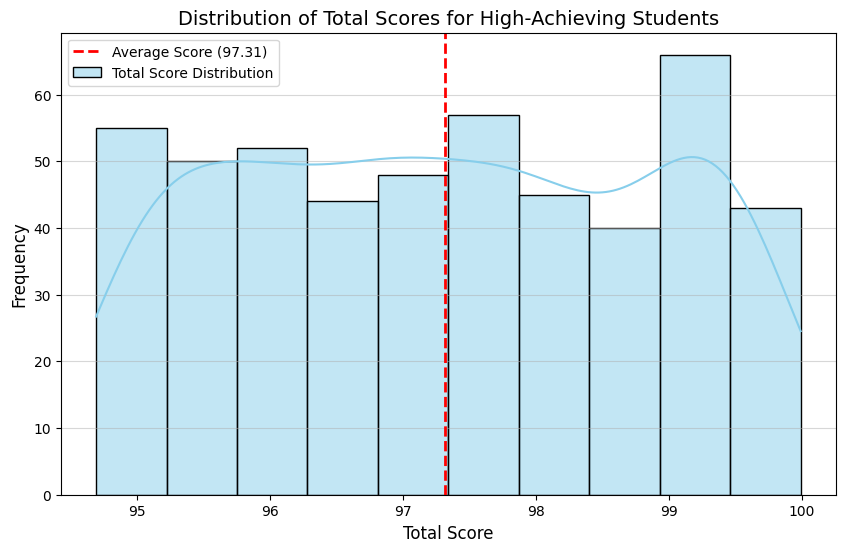

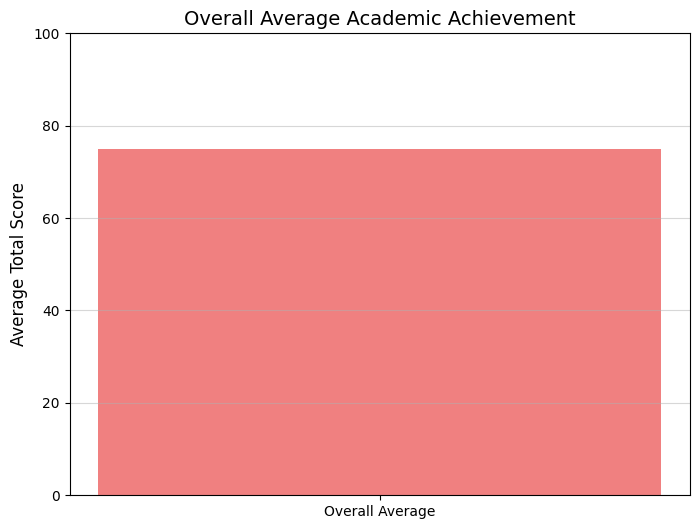

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization 1: Distribution of total scores for students who passed with high scores
plt.figure(figsize=(10, 6))
sns.histplot(df_high_pass['Total_Score'], kde=True, color='skyblue', label='Total Score Distribution')
plt.axvline(average_high_pass_score, color='red', linestyle='dashed', linewidth=2, label=f'Average Score ({average_high_pass_score:.2f})')
plt.title('Distribution of Total Scores for High-Achieving Students', fontsize=14)
plt.xlabel('Total Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=10)
plt.grid(axis='y', alpha=0.5)
plt.show()


# Visualization 2: Overall average academic achievement
plt.figure(figsize=(8, 6))
average_overall_score = df['Total_Score'].mean()
plt.bar(['Overall Average'], [average_overall_score], color='lightcoral')
plt.title('Overall Average Academic Achievement', fontsize=14)
plt.ylabel('Average Total Score', fontsize=12)
plt.ylim(0,100)
plt.grid(axis='y', alpha=0.5)
plt.show()

Model Accuracy: 0.997


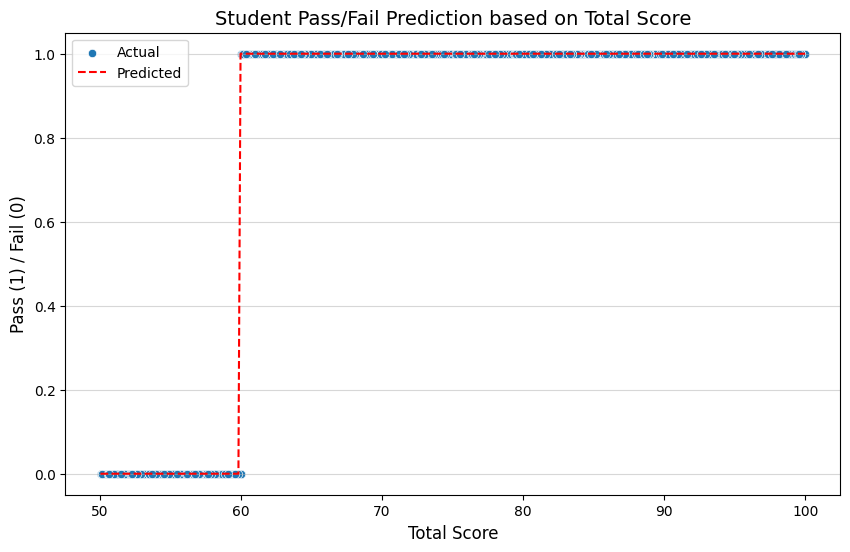

In [5]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# ... (Your existing code for data loading, cleaning, and analysis) ...

# Define passing threshold (e.g., 60)
passing_threshold = 60

# Create 'Pass' column in the original df DataFrame
df['Pass'] = df['Total_Score'] > passing_threshold

# Prepare data for the model
X = df[['Total_Score']]  # Features (Total_Score)
y = df['Pass']  # Target variable (Pass/Fail)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")

# Visualize the model's predictions
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['Total_Score'], y=y_test, label='Actual')
sns.lineplot(x=X_test['Total_Score'], y=y_pred, color='red', label='Predicted', linestyle='--')
plt.title('Student Pass/Fail Prediction based on Total Score', fontsize=14)
plt.xlabel('Total Score', fontsize=12)
plt.ylabel('Pass (1) / Fail (0)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(axis='y', alpha=0.5)
plt.show()

In [3]:
!pip install dash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 59.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 16.7 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: Flask
    Found existing installation: Flask 3.1.0
    Uninstalling Flask-3.1.0:
      Successfully uninstalled Flask-3.1.0


In [10]:
# prompt: create a dashboard for the average academic achievement , predicted students who passed , how many male students and female students using import dash

import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px

# Assuming your DataFrame 'df' is already created and processed as in your original code
# ... (your existing code for data loading, cleaning, and analysis) ...

# Define passing threshold (e.g., 60)
passing_threshold = 60

# Create 'Pass' column in the original df DataFrame
df['Pass'] = df['Total_Score'] > passing_threshold  # This line creates the 'Pass' column

# Calculate additional statistics
average_academic_achievement = df['Total_Score'].mean()
predicted_passed = sum(df['Pass'])  # Now 'Pass' column exists
male_students = df[df['Gender'] == 'Male'].shape[0]  # Assuming you have a 'Gender' column
female_students = df[df['Gender'] == 'Female'].shape[0] # Assuming you have a 'Gender' column

# Create the Dash app
app = dash.Dash(__name__)

# Define the app layout
app.layout = html.Div([
    html.H1("Student Performance Dashboard"),

    html.Div([
        html.Div([
            html.H3("Average Academic Achievement"),
            html.P(f"{average_academic_achievement:.2f}")
        ], className='card'),

        html.Div([
            html.H3("Predicted Students Passed"),
            html.P(predicted_passed)
        ], className='card'),

        html.Div([
            html.H3("Male Students"),
            html.P(male_students)
        ], className='card'),

        html.Div([
            html.H3("Female Students"),
            html.P(female_students)
        ], className='card'),
    ], className='grid-container'),

    dcc.Graph(id='score-distribution'),

    dcc.Graph(id='gender-distribution')
])

# Callback to update the score distribution graph based on dropdown selection
@app.callback(
    Output('score-distribution', 'figure'),
    Input('score-distribution', 'id') # Placeholder input
)
def update_score_graph(unused):
    fig = px.histogram(df, x='Total_Score', title='Distribution of Total Scores')
    return fig


@app.callback(
    Output('gender-distribution', 'figure'),
    Input('gender-distribution', 'id') # Placeholder input
)

def update_gender_graph(unused):
  gender_counts = df['Gender'].value_counts()
  fig = px.bar(gender_counts, x=gender_counts.index, y=gender_counts.values, title='Distribution of Students by Gender')
  return fig

if __name__ == '__main__':
    app.run(debug=True)

<IPython.core.display.Javascript object>

## Summary:

### Q&A
* **What is the average total score for students who passed with a high total score?**  The average total score for students who passed with a high total score (above the 90th percentile) is 97.31.

### Data Analysis Key Findings
* **Data Cleaning:**  Missing numeric values were filled with the column mean, and missing categorical values with the mode. Outliers in 'Total_Score' were removed using the IQR method. Negative values in score-related columns were replaced with 0, and 'Attendance (%)' values exceeding 100 were capped at 100.
* **High-Performing Students:** A 'Pass' column was created based on a 60 total score threshold. A high score threshold was defined at the 90th percentile of 'Total_Score'. A subset of data (`df_high_pass`) includes students who passed and achieved scores above this high threshold.
* **Average Score of High Performers:** The average 'Total_Score' for students in the `df_high_pass` subset is 97.31.
* **Overall Average Academic Achievement:** The overall average total score for all students in the dataset is visualized, providing context for the high-performing student group's average.

### Insights or Next Steps
* **Investigate factors contributing to high performance:** Analyze correlations between features (study hours, sleep, stress levels, etc.) and total scores for students in the `df_high_pass` group to identify key success factors.
* **Compare high-performing students to the overall student population:**  Further analysis comparing the `df_high_pass` group to the entire student population (`df`) can reveal significant differences in study habits, demographics, or other attributes.
